In [43]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt 
%matplotlib inline
enrollments = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/enrollment.xls")
pd.set_option('display.max_columns', 500)

In [44]:
enrollments['Higher_Secondary_Boys']=enrollments['Higher_Secondary_Boys'].astype('float')
enrollments['Higher_Secondary_Girls']=enrollments['Higher_Secondary_Girls'].astype('int')
enrollments['Higher_Secondary_Total']=enrollments['Higher_Secondary_Total'].astype('int')

In [45]:
print("\n Correlation between enrollment rates at different stages of schooling\n")
enrollments[['Primary_Total', 'Upper_Primary_Total', 'Secondary_Total','Higher_Secondary_Total']].corr().style.background_gradient(cmap='RdBu')


 Correlation between enrollment rates at different stages of schooling



,Primary_Total,Upper_Primary_Total,Secondary_Total,Higher_Secondary_Total
Primary_Total,1.000000,0.698719,0.064725,-0.203437
Upper_Primary_Total,0.698719,1.000000,0.541461,0.070695
Secondary_Total,0.064725,0.541461,1.000000,0.602627
Higher_Secondary_Total,-0.203437,0.070695,0.602627,1.000000


In [46]:
states=[]
for i in range(1,37):
    states.append(enrollments.State_UT.iloc[3*i])
states=pd.DataFrame(states, columns=['State'])
enrollments.drop(['State_UT','Year'],axis=1,inplace=True)
x=pd.DataFrame()
for i in range(36):
    x[i]=enrollments.iloc[3*i+0:i*3+3,:].mean()
x=x.transpose() 

In [48]:
def create_clusters(x):

    scores=[]
    for i in range(4,36):
        k=KMeans(n_clusters=i,n_init=500, max_iter=500)
        k.fit(x[['Primary_Total', 'Upper_Primary_Total', 'Secondary_Total','Higher_Secondary_Total']])
        label=KMeans.predict(k,x[['Primary_Total', 'Upper_Primary_Total', 'Secondary_Total','Higher_Secondary_Total']])
        scores.append(silhouette_score(x, label))

    pd.DataFrame(scores).plot()
    best_cluster_no=np.argmax(scores[2:36])+2
    plt.axvline(best_cluster_no)
    plt.text(best_cluster_no, 0.34,s=f"Max silhoutte score at n={best_cluster_no}")
    plt.xlabel("No. of clusters")
    plt.ylabel("Silhoutte score")
    kk=KMeans(n_clusters=best_cluster_no)

    kk.fit(x[['Primary_Total', 'Upper_Primary_Total', 'Secondary_Total','Higher_Secondary_Total']])
    lab = pd.DataFrame(kk.labels_,columns=['Labels'])
    result=pd.concat([states['State'],x,lab['Labels']],axis=1)
    return result

,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
Labels,,,,,,,,,,,,
0,90.140000,90.048000,89.980667,96.164667,94.818000,95.259333,103.787333,103.434000,103.630000,90.547333,89.200000,89.466667
5,113.095000,111.406667,112.165000,127.556667,137.528333,134.396667,102.443333,111.910000,107.030000,72.963333,83.333333,77.666667
6,97.385556,100.211667,98.679444,91.862222,97.416111,94.372222,88.011111,89.340556,88.657778,67.011111,72.166667,69.166667
4,103.851667,105.050000,104.418333,100.734167,103.584167,102.081667,99.901667,100.607500,100.268333,58.477500,59.000000,58.500000
2,131.499167,132.518333,131.998333,119.860833,126.560833,123.149167,90.527500,92.967500,91.733333,55.404167,56.000000,55.416667
3,91.150952,91.863810,91.459524,82.620952,85.257619,83.781905,76.266667,75.469524,75.785714,52.360476,53.238095,52.047619
1,103.956667,105.531250,104.707500,92.468333,99.270000,95.676667,73.767500,75.617917,74.671667,38.352500,37.416667,37.416667


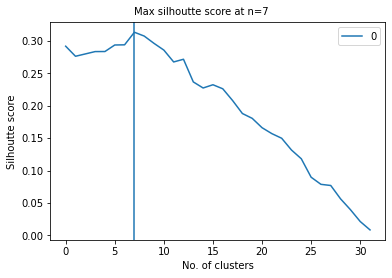

In [49]:
result=create_clusters(x)

result.groupby('Labels')[result.columns[1:-1]].agg('mean').sort_values([ 'Higher_Secondary_Total','Secondary_Total','Upper_Primary_Total', 'Primary_Total'], ascending=[False,False,False, False]).style.background_gradient(cmap="RdBu")

In [52]:
reqd=result.groupby('Labels')[result.columns[1:-1]].agg('mean')
reqd['Average dropout'] = (reqd[ 'Higher_Secondary_Total']+reqd['Secondary_Total']+reqd['Upper_Primary_Total']+reqd['Primary_Total'])/4
reqd.sort_values(['Average dropout'], ascending=False).style.background_gradient(cmap='Greens')

,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total,Average dropout
Labels,,,,,,,,,,,,,
5,113.095000,111.406667,112.165000,127.556667,137.528333,134.396667,102.443333,111.910000,107.030000,72.963333,83.333333,77.666667,107.814583
2,131.499167,132.518333,131.998333,119.860833,126.560833,123.149167,90.527500,92.967500,91.733333,55.404167,56.000000,55.416667,100.574375
0,90.140000,90.048000,89.980667,96.164667,94.818000,95.259333,103.787333,103.434000,103.630000,90.547333,89.200000,89.466667,94.584167
4,103.851667,105.050000,104.418333,100.734167,103.584167,102.081667,99.901667,100.607500,100.268333,58.477500,59.000000,58.500000,91.317083
6,97.385556,100.211667,98.679444,91.862222,97.416111,94.372222,88.011111,89.340556,88.657778,67.011111,72.166667,69.166667,87.719028
1,103.956667,105.531250,104.707500,92.468333,99.270000,95.676667,73.767500,75.617917,74.671667,38.352500,37.416667,37.416667,78.118125
3,91.150952,91.863810,91.459524,82.620952,85.257619,83.781905,76.266667,75.469524,75.785714,52.360476,53.238095,52.047619,75.768690


In [53]:
grouping=result[['State','Labels']]
clusters=pd.DataFrame()
for l in grouping.Labels.unique():
    clusters=pd.concat([clusters,pd.Series(np.array(grouping.State[grouping.Labels==l]), name=f"Cluster {l+1}").to_frame()],axis=1)
clusters.replace({np.nan:'-'},inplace=True)
clusters.sort_index(axis=1)

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
0,Andhra Pradesh,Bihar,Assam,Andaman & Nicobar Islands,Dadra & Nagar Haveli,Goa,Himachal Pradesh
1,Chhattisgarh,Chandigarh,Meghalaya,Arunachal Pradesh,Gujarat,Tamil Nadu,Manipur
2,Jammu And Kashmir,Haryana,Mizoram,Daman & Diu,Tripura,-,Punjab
3,Lakshadweep,Karnataka,Nagaland,Delhi,Uttar Pradesh,-,Rajasthan
4,Madhya Pradesh,Kerala,-,Jharkhand,-,-,Telangana
5,-,Maharashtra,-,Sikkim,-,-,West Bengal
6,-,Odisha,-,Uttaranchal,-,-,-
7,-,Pondicherry,-,-,-,-,-
